In [1]:
# coding: utf-8


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh



# ## Extracting the principal components step-by-step

df_wine = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
        header=None)

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()



# Splitting the data into 70% training and 30% test subsets.

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                     stratify=y, random_state=0)


# Standardizing the data.

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)




# Eigendecomposition of the covariance matrix.

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)



Eigenvalues 
[ 4.84274532  2.41602459  1.54845825  0.96120438  0.84166161  0.6620634
  0.51828472  0.34650377  0.3131368   0.10754642  0.21357215  0.15362835
  0.1808613 ]


In [31]:
df_wine.head(10)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


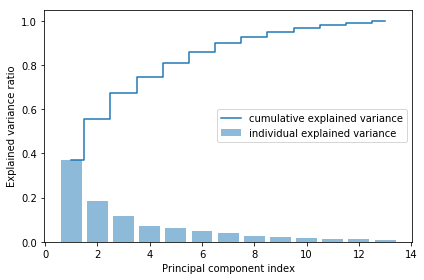

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


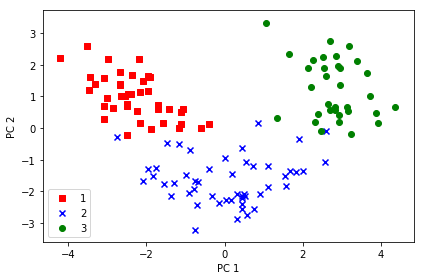

In [2]:

# ## Total and explained variance

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)





plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()



# ## Feature transformation


# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)




w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)


X_train_std[0].dot(w)



X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()



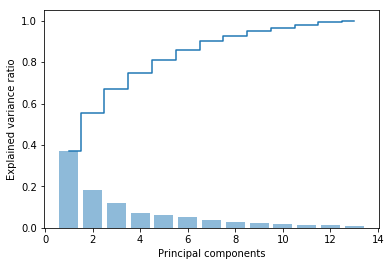

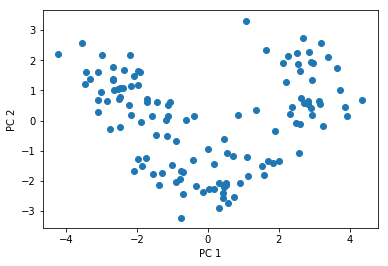

In [22]:

##########
# PCA in scikit-learn
##########


pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_



plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()




pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)



plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [15]:
X_train_pca

array([[ 2.383 ,  0.4546, -0.227 , ...,  0.2973,  0.2349, -0.4016],
       [-1.9658,  1.6538,  1.3871, ..., -0.1433, -0.2721, -0.0149],
       [-2.5391,  1.0291,  1.3255, ..., -0.1574,  0.6456,  0.1384],
       ..., 
       [ 4.3531,  0.6654, -1.3174, ..., -0.0915,  0.3771,  0.3856],
       [-1.8432, -1.5069,  0.2463, ..., -0.1732,  0.8639, -1.0056],
       [-0.4086, -1.2972,  1.4032, ...,  0.4615,  0.1072, -0.0938]])

In [16]:
X_train_pca[:, 0]

array([ 2.383 , -1.9658, -2.5391, -1.4301,  3.1415,  0.5025,  0.0487,
        2.4789,  2.019 ,  0.7516,  0.7227, -3.0037,  2.5752,  3.7315,
       -1.1228,  2.86  , -0.7472, -1.5843,  3.3889,  3.1541, -1.2804,
       -1.7144, -1.5504,  1.1098, -0.6911, -2.086 ,  2.9039, -2.0764,
       -1.7476,  2.5942, -2.5037, -2.1945,  3.9163, -1.1174, -0.9   ,
       -1.7147, -2.4858, -0.7608,  2.9265,  2.9442, -2.3899,  2.6389,
        2.5101,  3.6525, -2.6517,  0.5254,  2.702 ,  3.1841,  1.1252,
        2.9237, -1.9612,  0.5447, -0.7703, -1.1667, -1.3648,  0.4356,
        2.9619,  2.8361,  1.904 , -2.4858, -2.1658,  0.0067,  1.0656,
        2.1312,  1.5354, -2.6678,  0.5728, -0.7071, -0.9961, -2.6732,
       -2.3637, -0.3917, -2.9891, -1.9182,  2.3114, -1.0605, -2.7486,
        2.2665, -1.1552,  0.166 ,  1.3559, -3.3119, -0.3325, -2.2321,
        0.1858,  0.8456,  2.695 ,  0.4465, -1.8896, -3.0813, -3.4572,
        3.8767,  1.5755, -3.4334, -4.2064, -0.1404,  1.8273,  2.2056,
        1.65  , -1.4

In [25]:
# random forest
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import train_test_split

model=RandomForestClassifier(n_estimators=10,random_state=8)
fittedModel=model.fit(X_train_std,y_train)

fittedModel


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

['Alcohol' 'Malic acid' 'Ash' 'Alcalinity of ash' 'Magnesium'
 'Total phenols' 'Flavanoids' 'Nonflavanoid phenols' 'Proanthocyanins'
 'Color intensity' 'Hue' 'OD280/OD315 of diluted wines' 'Proline']
[ 8  1  2  3  6  4  7 10 11  5  0  9 12]
변수 중요도
[(0.2702, 'Proline'), (0.13339999999999999, 'Color intensity'), (0.1229, 'Alcohol'), (0.10299999999999999, 'Total phenols'), (0.085000000000000006, 'OD280/OD315 of diluted wines'), (0.069400000000000003, 'Hue'), (0.047, 'Nonflavanoid phenols'), (0.038600000000000002, 'Magnesium'), (0.032300000000000002, 'Flavanoids'), (0.029399999999999999, 'Alcalinity of ash'), (0.029000000000000001, 'Ash'), (0.024400000000000002, 'Malic acid'), (0.0154, 'Proanthocyanins')]


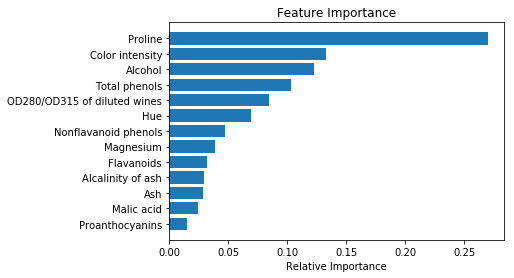

In [28]:
names = df_wine.iloc[:, 1:].columns.values
print(names)
importances = fittedModel.feature_importances_
sorted_importances = np.argsort(importances)
print(sorted_importances)
print("변수 중요도")
print(sorted(zip(map(lambda x: round(x, 4), fittedModel.feature_importances_), names), reverse=True))
padding = np.arange(len(names)) + 0.5
plt.barh(padding, importances[sorted_importances], align='center')
# plt.barh(padding, importances[sorted_importances])
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Feature Importance")
plt.show()

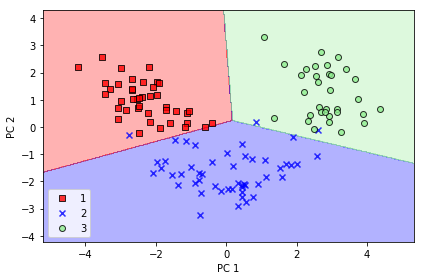

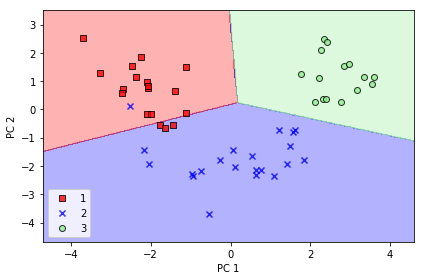

array([ 0.3695,  0.1843,  0.1182,  0.0733,  0.0642,  0.0505,  0.0395,
        0.0264,  0.0239,  0.0163,  0.0138,  0.0117,  0.0082])

In [24]:

# import sys; sys.path.append('~~/lib')
from mylib import plot_decision_regions





# Training logistic regression classifier using the first 2 principal components.


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)




plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()




plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()




pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


In [34]:
X_train_pca

array([[ 2.383 ,  0.4546, -0.227 , ...,  0.2973,  0.2349, -0.4016],
       [-1.9658,  1.6538,  1.3871, ..., -0.1433, -0.2721, -0.0149],
       [-2.5391,  1.0291,  1.3255, ..., -0.1574,  0.6456,  0.1384],
       ..., 
       [ 4.3531,  0.6654, -1.3174, ..., -0.0915,  0.3771,  0.3856],
       [-1.8432, -1.5069,  0.2463, ..., -0.1732,  0.8639, -1.0056],
       [-0.4086, -1.2972,  1.4032, ...,  0.4615,  0.1072, -0.0938]])

In [5]:

########
# PCA vs. LDA
########

###
# Inner workings of LDA
###

# scatter matrices
# Calculate the mean vectors for each class:

np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))


# Within-class scatter matrix:

d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))


# Better: covariance matrix since classes are not equally distributed:

print('Class label distribution: %s' % np.bincount(y_train)[1:])



d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))


# Compute the between-class scatter matrix:

mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))



MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]

Within-class scatter matrix: 13x13
Class label distribution: [41 50 33]
Scaled within-class scatter matrix: 13x13
Between-class scatter matrix: 13x13


Eigenvalues in descending order:

349.617808906
172.76152219
2.84217094304e-14
2.80291837127e-14
2.80291837127e-14
2.321153178e-14
1.71078065239e-14
1.36214111665e-14
1.36214111665e-14
1.21597765325e-14
6.67573958306e-15
3.55125961488e-15
3.55125961488e-15


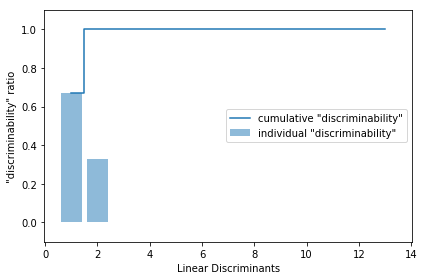

Eigenvalues in descending order:

349.617808906
172.76152219
2.84217094304e-14
2.80291837127e-14
2.80291837127e-14
2.321153178e-14
1.71078065239e-14
1.36214111665e-14
1.36214111665e-14
1.21597765325e-14
6.67573958306e-15
3.55125961488e-15
3.55125961488e-15


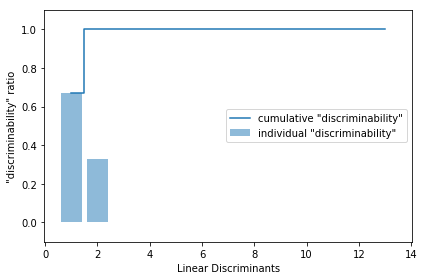

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


In [7]:

# ## Selecting linear discriminants for the new feature subspace
# Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:


eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))


# Sort eigenvectors in descending order of the eigenvalues:

# Make a list of (eigenvalue, eigenvector) tuples

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)


# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])




tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()


# ## Selecting linear discriminants for the new feature subspace
# Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:


eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))


# Sort eigenvectors in descending order of the eigenvalues:

# Make a list of (eigenvalue, eigenvector) tuples

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)


# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])




tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()


w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)



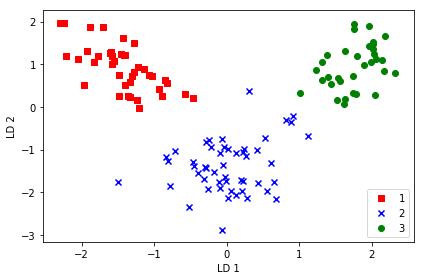

In [8]:

# ## Projecting samples onto the new feature space

X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()


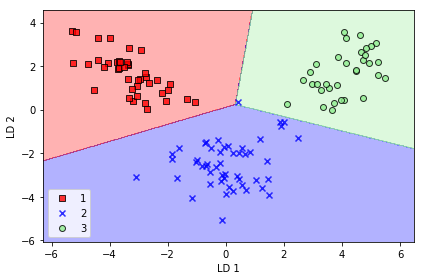

In [9]:

#######
# LDA via scikit-learn
#######

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)


lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

In [19]:
X_train_lda

array([[  2.9646e+00,   1.1570e+00],
       [ -3.3501e+00,   2.0709e+00],
       [ -3.0616e+00,   1.0937e+00],
       [ -2.7330e+00,   1.4936e+00],
       [  3.5461e+00,   9.9221e-01],
       [ -1.6527e-02,  -2.9567e+00],
       [  2.6522e-01,  -3.7108e+00],
       [  3.3546e+00,   1.4185e-01],
       [  8.2789e-01,  -1.9182e+00],
       [  1.4727e+00,  -3.9223e+00],
       [  5.5526e-01,  -1.7793e+00],
       [ -4.4165e+00,   2.2929e+00],
       [  1.8989e+00,  -7.6604e-01],
       [  5.4980e+00,   1.4641e+00],
       [ -2.0055e+00,   9.0166e-01],
       [  4.6644e+00,   2.6452e+00],
       [ -1.1324e-01,  -5.0612e+00],
       [ -3.1985e+00,   3.8263e-01],
       [  4.0860e+00,   3.5463e+00],
       [  3.4481e+00,   1.1687e+00],
       [  6.8441e-01,  -3.6978e+00],
       [ -3.3497e+00,   2.1121e+00],
       [ -1.8369e+00,  -2.2837e+00],
       [  6.6553e-01,  -2.0149e+00],
       [ -9.9246e-01,  -2.3026e+00],
       [ -1.6934e+00,  -3.1309e+00],
       [  4.4900e+00,   1.7587e+00],
 

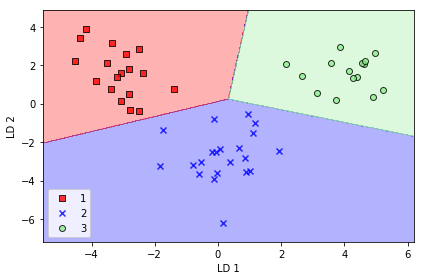

In [10]:

X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()


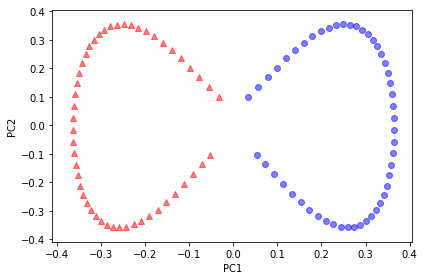

In [11]:

#######
# kernel PCA
# for nonlinear mappings
#######



# ## Kernel principal component analysis in scikit-learn

from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA


X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('images/05_19.png', dpi=300)
plt.show()
